# Statistiques descriptives 

## Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


In [2]:
enedis_final=pd.read_csv("Données/enedis_final.csv")

In [3]:
enedis_final=enedis_final.loc[enedis_final["date"]<"2021-07-31"]

Pour les analyses, on ne va garder que les profils dont la conso est < 6kVa et > 6kVa :


In [4]:
enedis_final_basse=enedis_final[(enedis_final["profil"]=="RES1 (+ RES1WE)")|(enedis_final["profil"]=="RES11 (+ RES11WE)")]

Pour retrouver les points de soutirages tous égaux à chaque 1/2h :

In [29]:
test=enedis_final[(enedis_final["region_x"]=="Normandie") & (enedis_final["profil"]=="RES1 (+ RES1WE)") & (enedis_final["plage_de_puissance_souscrite"]=="P1: ]0-3] kVA")]

In [30]:
test

,horodate,region_x,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type,...,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,tmoy
437,2020-06-04T00:00:00+00:00,Normandie,28,2571004.0,P1: ]0-3] kVA,70029,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,13.02
715,2020-06-04T01:00:00+00:00,Normandie,28,2440790.0,P1: ]0-3] kVA,70029,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,13.02
1023,2020-06-04T01:30:00+00:00,Normandie,28,2402561.0,P1: ]0-3] kVA,70029,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,13.02
1211,2020-06-04T02:00:00+00:00,Normandie,28,2399949.0,P1: ]0-3] kVA,70029,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,13.02
1796,2020-06-04T03:30:00+00:00,Normandie,28,2513493.0,P1: ]0-3] kVA,70029,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,13.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573160,2021-07-30T20:30:00+00:00,Normandie,28,3892750.0,P1: ]0-3] kVA,65803,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,16.65
4573435,2021-07-30T21:00:00+00:00,Normandie,28,3595503.0,P1: ]0-3] kVA,65803,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,16.65
4573954,2021-07-30T22:00:00+00:00,Normandie,28,3006224.0,P1: ]0-3] kVA,65783,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,16.65
4574357,2021-07-30T23:00:00+00:00,Normandie,28,2637834.0,P1: ]0-3] kVA,65783,0,0,RES1 (+ RES1WE),RES,...,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2,16.65


In [20]:
enedis_final_basse.groupby(["horodate","profil","plage_de_puissance_souscrite"])["nb_points_soutirage"].sum().reset_index().head(50)

,horodate,profil,plage_de_puissance_souscrite,nb_points_soutirage
0,2020-06-04T00:00:00+00:00,RES1 (+ RES1WE),P0: Total <= 36 kVA,14289641
1,2020-06-04T00:00:00+00:00,RES1 (+ RES1WE),P1: ]0-3] kVA,1541564
2,2020-06-04T00:00:00+00:00,RES1 (+ RES1WE),P2: ]3-6] kVA,12748053
3,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P0: Total <= 36 kVA,2993590
4,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P3: ]6-9] kVA,2207809
5,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P4: ]9-12] kVA,545721
6,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P5: ]12-15] kVA,79426
7,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P6: ]15-18] kVA,121122
8,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P7: ]18-24] kVA,13877
9,2020-06-04T00:00:00+00:00,RES11 (+ RES11WE),P8: ]24-30] kVA,5242


## 1. Dynamique annuelle (consommation électrique et météo)

#### Statistiques sur les températures

* Variation de la température par jour par région 
  

In [75]:
def temp_day_region(df,region):
    res=enedis_final[enedis_final["region_x"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour "+region,size=18)
    
    

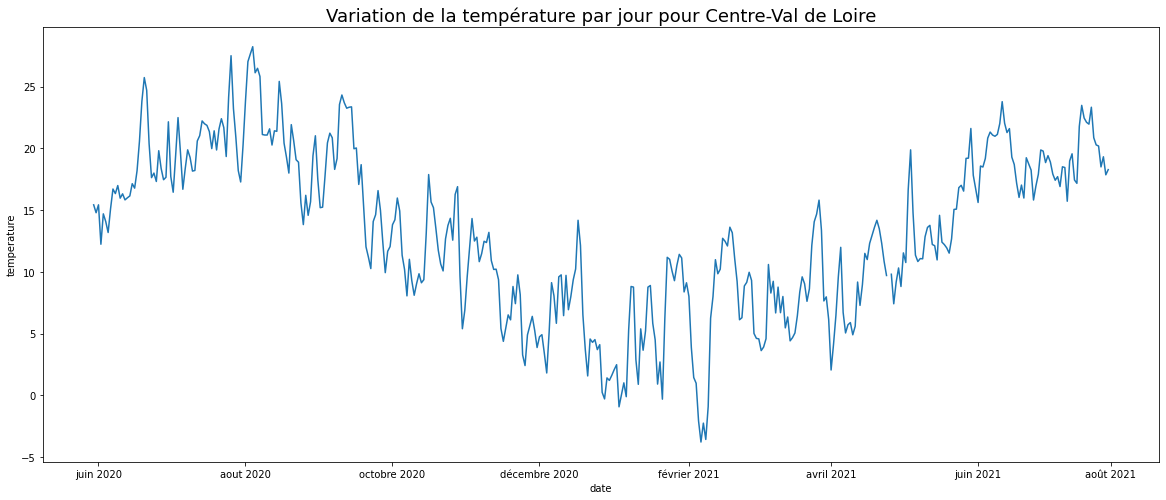

In [42]:
plt.figure(figsize=(20, 8))
temp_day_region(enedis_final,'Centre-Val de Loire')

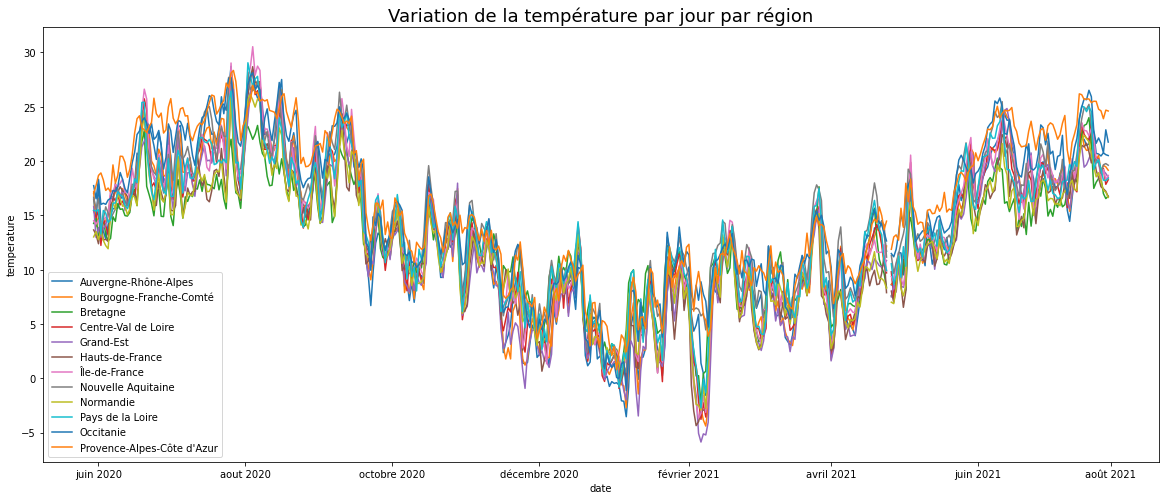

In [43]:
regions=list(enedis_final["region_x"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(20, 8))
    for region in regions:
        temp_day_region(enedis_final,region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_final,regions)

### Statistiques sur la consommation :

* Variation de la consommation électrique sur l'année pour la France 

In [5]:
def conso_day_france(df):
    nb_total_habitant=67750000

    res=df.groupby("date")["total_energie_soutiree_wh"].sum()
    res=res/nb_total_habitant
    print(res.mean())
    res=res/nb_total_habitant
    plt.figure(figsize=(20, 8))
    plt.grid(True)
    plt.plot(res,"c")

    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique par habitant sur 1 an pour la France ",size=18)
    plt.show

    

En moyenne, un ménage français consomme donc 12,5 KWh par jour (source : RTE). https://www.lenergietoutcompris.fr/actualites-conseils/quelle-est-la-consommation-delectricite-moyenne-par-jour-en-france#:~:text=En%20moyenne%2C%20un%20m%C3%A9nage%20fran%C3%A7ais,montre%20le%20tableau%20ci%2Ddessous.   

Avec nos données, nous trouvons une conso moyenne par ménage de 14kWh.

A l'année, la consommation total est de 174 TWh, ce qui correspond bien à ce qu enous trouvons sur internet.

2055.153044762559


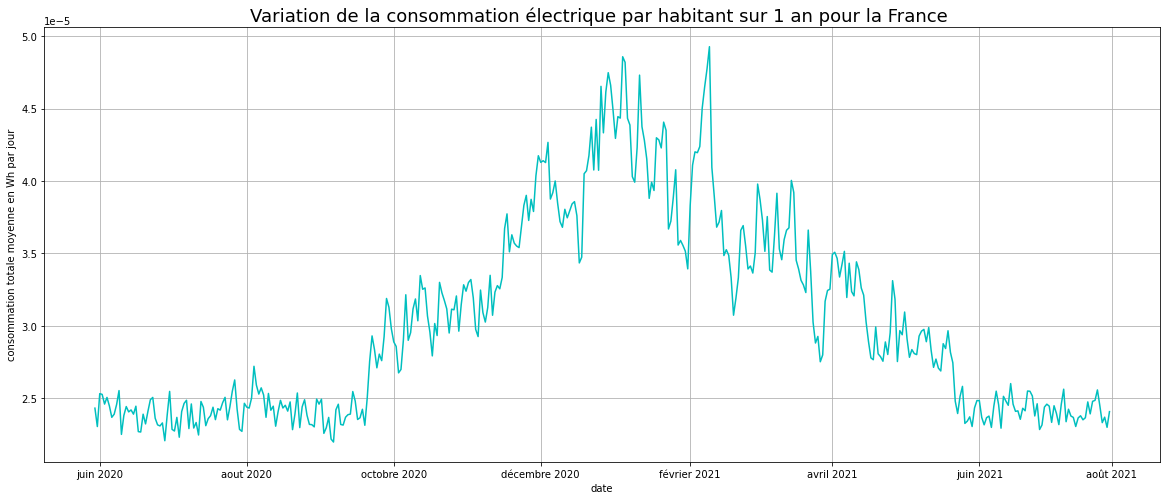

In [141]:

conso_day_france(enedis_final)


* Variation de la consommation électrique sur l'année par région

In [27]:
def conso_day_reg(df,region):
    res=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum()

    population=enedis_final[enedis_final["region_x"]==region]["Population au dernier recensement 2018"]
    nb_population=population.values[0]

    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    print(nb_population)
    #res=res/nb_population
    print(res.mean())

    plt.figure(figsize=(20, 4))
    plt.grid(True)

    plt.plot(res,"c")
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique moyenne par habitant sur 1 an pour "+region,size=18)
    plt.show
    

5052832.0
11242163718.765404
12213447.0
29828277765.12796
3327477.0
6631520226.042654


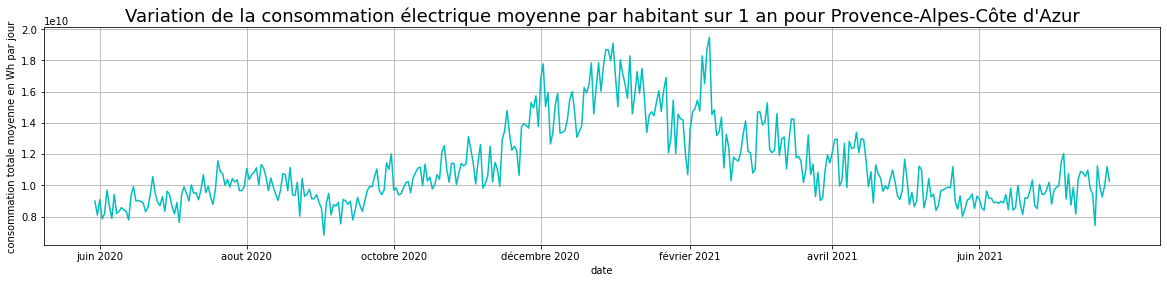

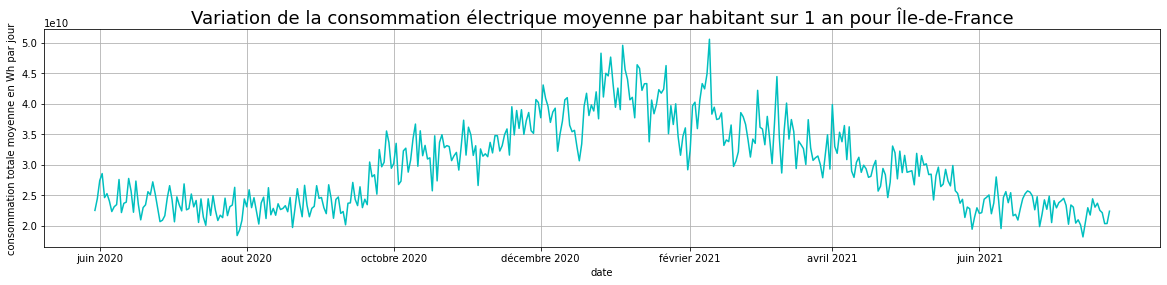

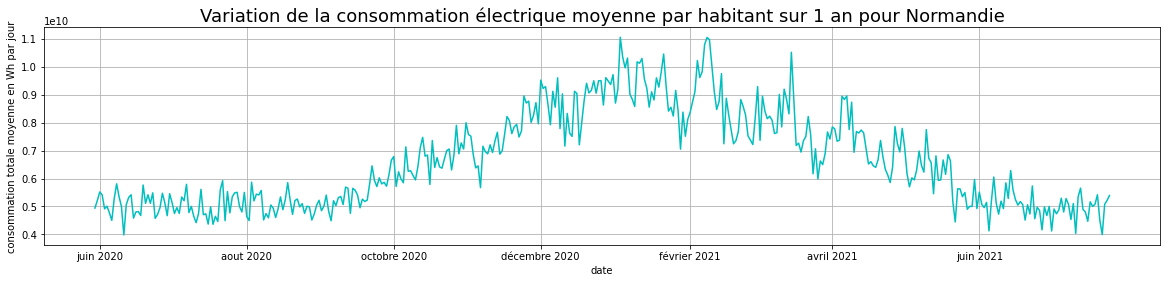

In [28]:
conso_day_reg(enedis_final_basse,"Provence-Alpes-Côte d'Azur")
#conso_day_reg(enedis_final_basse,'Hauts-de-France')
conso_day_reg(enedis_final_basse,'Île-de-France')
#conso_day_reg(enedis_final_basse,'Bretagne')
#conso_day_reg(enedis_final_basse,'Grand-Est')
conso_day_reg(enedis_final_basse,'Normandie')


* Corrélation température/consommation électrique, par région 

In [12]:
def corr_total_energie_temperature(df,region):
    plt.figure(figsize=(20, 8))
    plt.ylabel("total moyen d'énergie soutirée par jour (Wh)")
    plt.xlabel('temperature')
    plt.legend()
    plt.grid(True)
    plt.title("Corrélation entre température moyenne et totale moyen d'énergie moyenne soutirée par ménage et par jour pour "+region,size=18)

    X1=df[df["region_x"]==region].groupby("date")["tmoy"].mean() # moyenne des températures par jour
    X2=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum() # moyenne énergie soutirée par jour 
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    X2=X2/nb_menage

    plt.plot(X1,X2,"oc")

    plt.show()
    correlation=X1.corr(X2)
    print("La corrélation est de " +str(correlation))
    

No handles with labels found to put in legend.


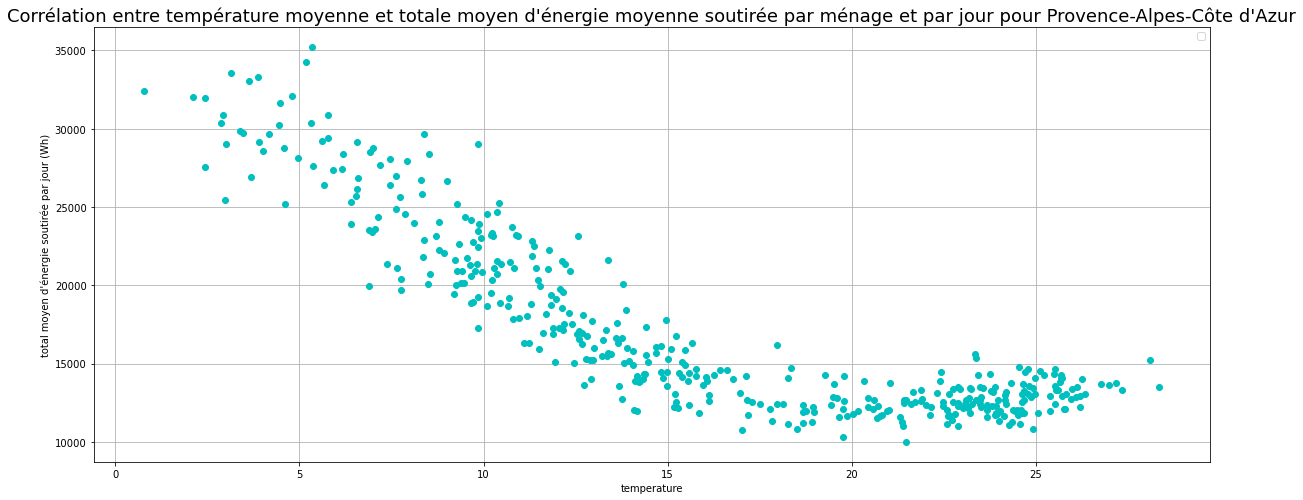

No handles with labels found to put in legend.


La corrélation est de -0.8570516072726629


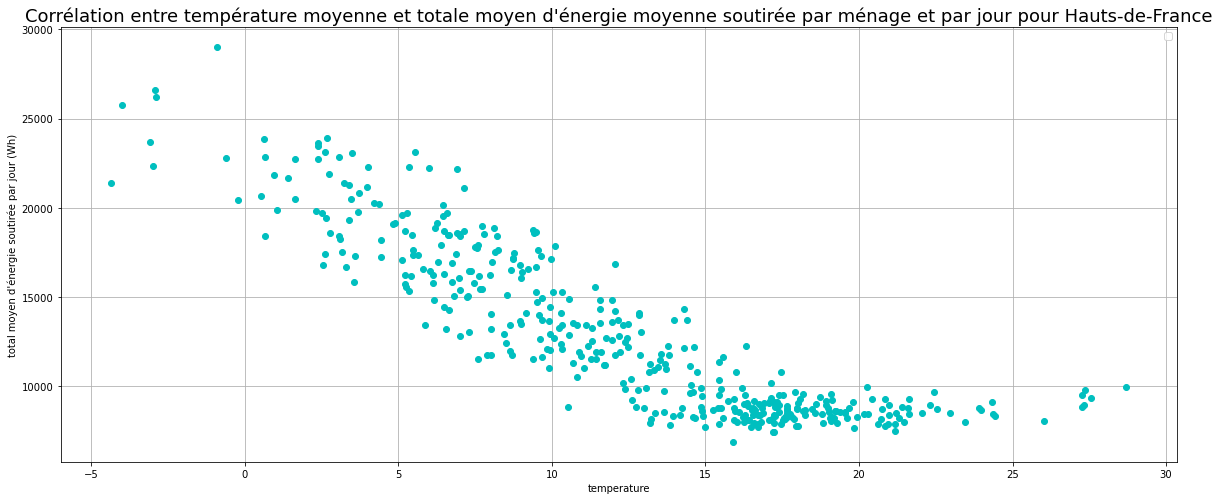

No handles with labels found to put in legend.


La corrélation est de -0.8850102091202477


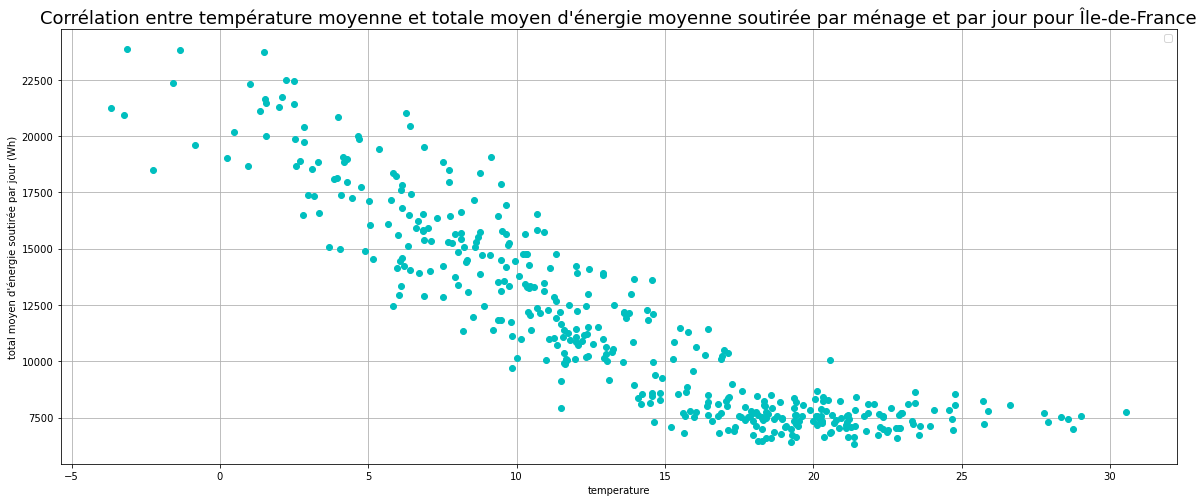

La corrélation est de -0.9013080114247976


In [13]:
# Les points correspondent à un jour : donc il y a plus de 365 points
#pour PACA, plus d'énergie soutirée en été à partir de 25 degrés que pour d'autres régions (effet clim) (600kW)

corr_total_energie_temperature(enedis_final,"Provence-Alpes-Côte d'Azur")
corr_total_energie_temperature(enedis_final,"Hauts-de-France")
corr_total_energie_temperature(enedis_final,"Île-de-France")




## 2. Dynamique saisonnière 

In [123]:
enedis_final_basse["mois"]=enedis_final_basse["date"].apply(lambda x : x[5:7])


<ipython-input-123-f8a63bca2f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enedis_final_basse["mois"]=enedis_final_basse["date"].apply(lambda x : x[5:7])


In [124]:
ete=enedis_final_basse[(enedis_final_basse["mois"]=="06")|(enedis_final_basse["mois"]=="07")|(enedis_final_basse["mois"]=="08")]

automne=enedis_final_basse[(enedis_final_basse["mois"]=="09")|(enedis_final_basse["mois"]=="10")|(enedis_final_basse["mois"]=="11")]

hiver=enedis_final_basse[(enedis_final_basse["mois"]=="12")|(enedis_final_basse["mois"]=="01")|(enedis_final_basse["mois"]=="02")]

printemps=enedis_final_basse[(enedis_final_basse["mois"]=="03")|(enedis_final_basse["mois"]=="04")|(enedis_final_basse["mois"]=="05")]

#### Molaire conso totale moyenne d'un jour de la saison par ménage : 

In [128]:
# molaire conso moyenne par heure pour chaque jour de la saison
def molaire_saison(data_saison,region,saison,color):
    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index() # pour chaque jour, on calcule la conso totale pour chaque heure
    total_conso_saison_region=total_conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].mean() # on fait une moyenne (temporelle) du profil de conso totale sur la saison
    
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"] #ménage ou population ?
    total_conso_saison_region=total_conso_saison_region/menage.values[0]

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(total_conso_saison_region,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.grid(True)
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   

haute=[ete,automne,hiver,printemps]

def molaire_toute_saison(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    

    if type_conso=="toutes conso":
        molaire_saison(ete,region,"été","orangered")
        molaire_saison(automne,region,"automne","brown")
        molaire_saison(hiver,region,"hiver","c")
        molaire_saison(printemps,region,"printemps","green")

    
    

    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation totale d'énergie")
    plt.legend()
    plt.title("Molaire de consommation d'un ménage par saison pour la région "+region,size=25)
   
    plt.show()
   

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


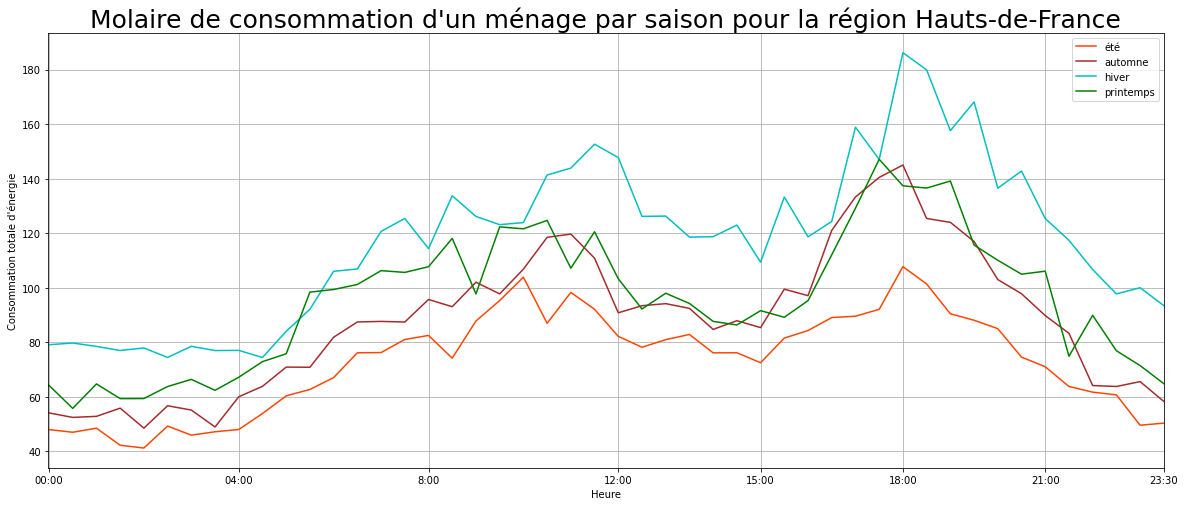

In [129]:
molaire_toute_saison("Hauts-de-France","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


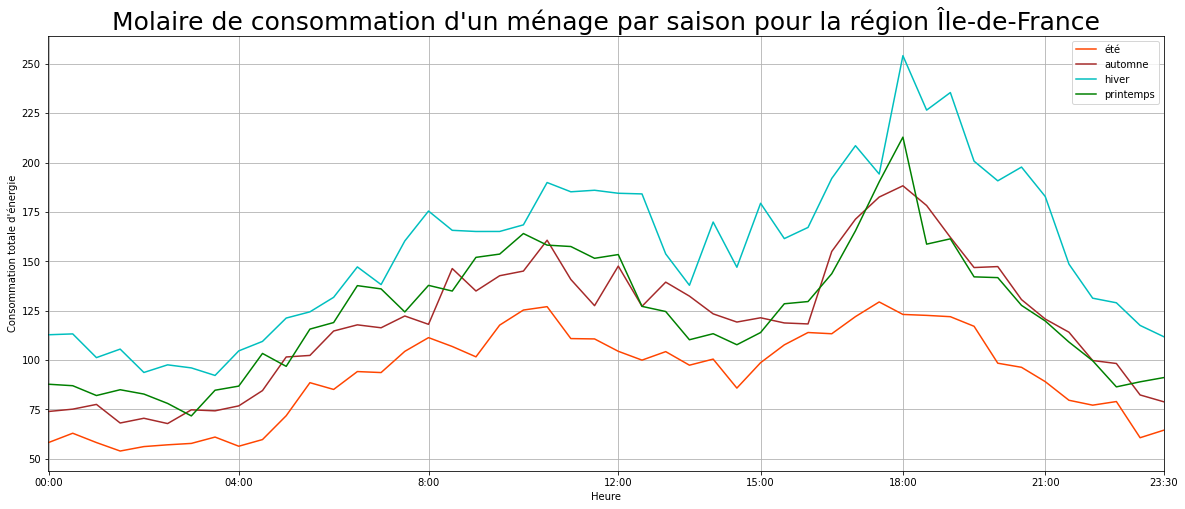

In [142]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


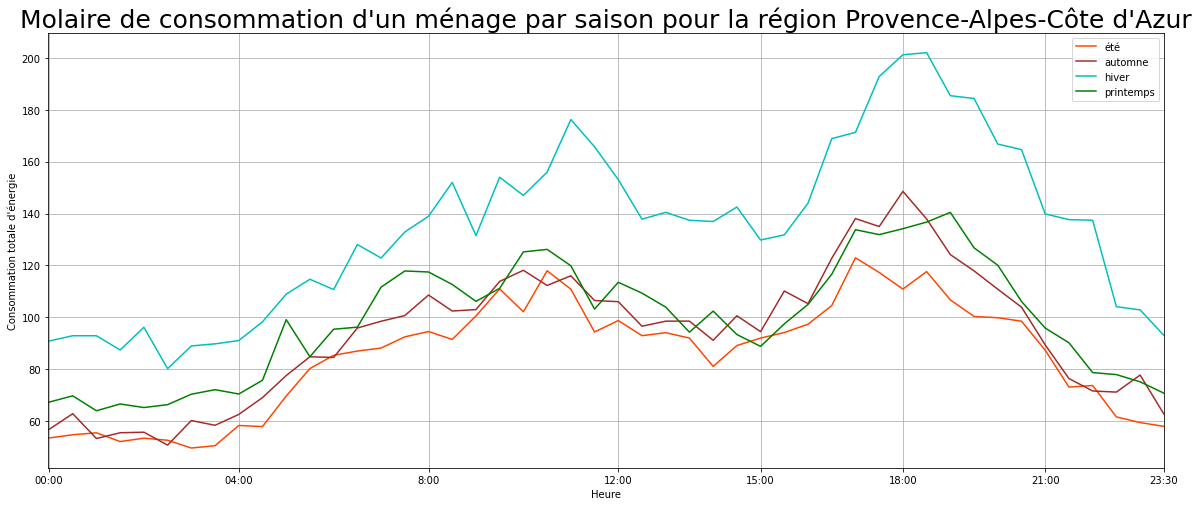

In [143]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


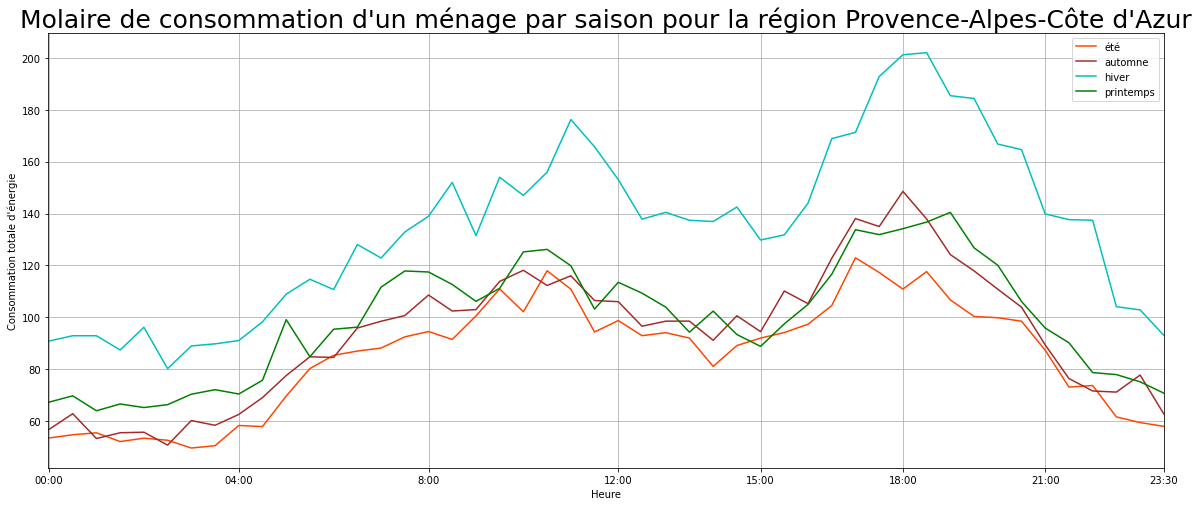

In [144]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


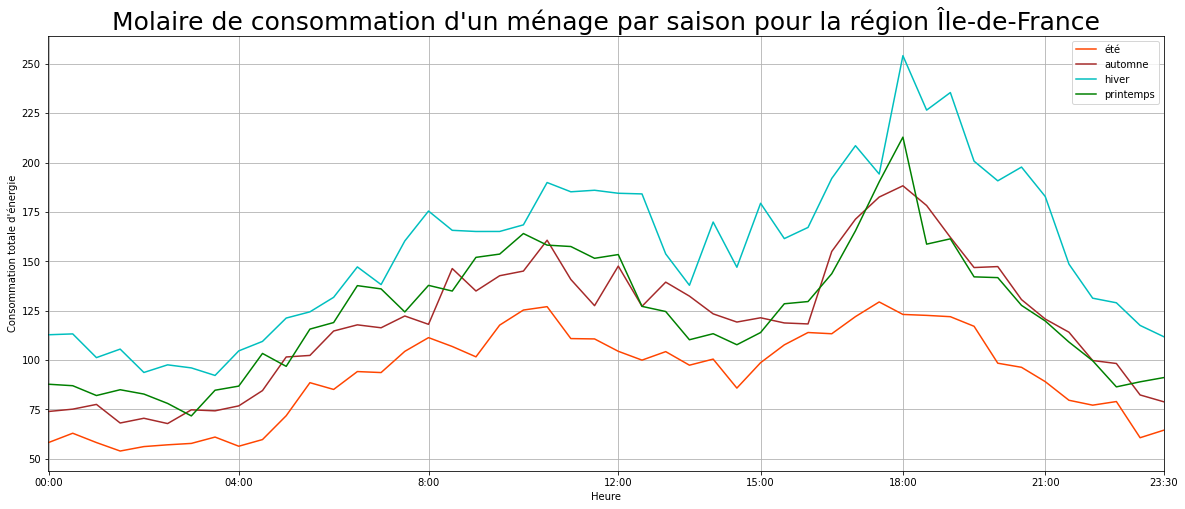

In [132]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


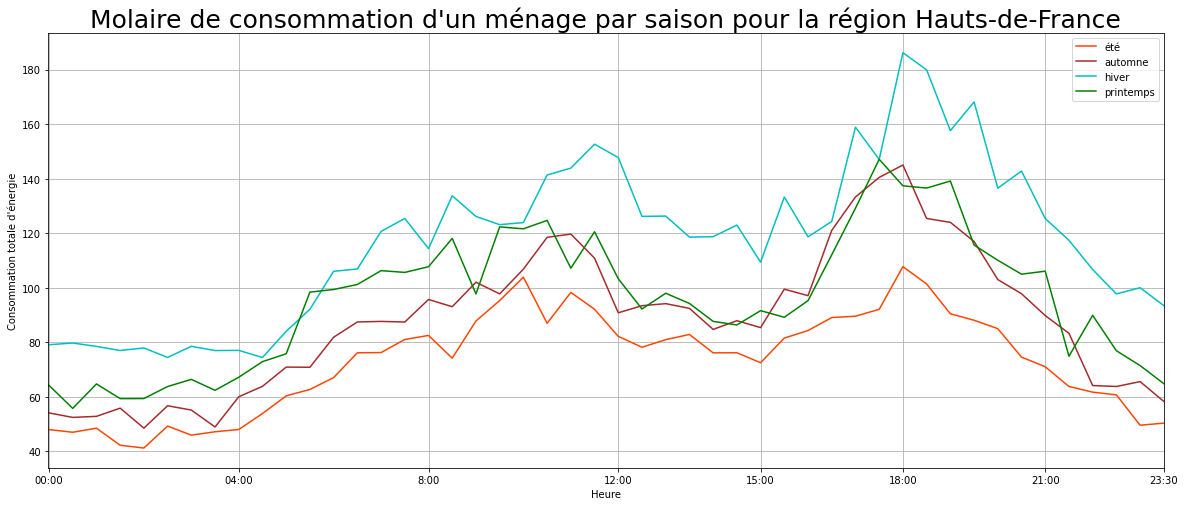

In [145]:
molaire_toute_saison("Hauts-de-France","toutes conso")

### Molaire de la consommation électrique moyenne par jour d'une même saison et par habitants

In [146]:
# molaire conso moyenne par heure pour chaque jour de la saison par habitant
def molaire_saison_habitant(data_saison,region,saison,color):
    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index() # pour chaque jour, on calcule la conso totale pour chaque heure
    total_conso_saison_region=total_conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].mean() # on fait une moyenne (temporelle) du profil de conso totale sur la saison
    
    population=enedis_final[enedis_final["region_x"]==region]["Population au dernier recensement 2018"] #ménage ou population ?
    total_conso_saison_region=total_conso_saison_region/population.values[0]

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(total_conso_saison_region,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.grid(True)
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   

haute=[ete,automne,hiver,printemps]

def molaire_toute_saison_habitant(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    

    if type_conso=="toutes conso":
        molaire_saison_habitant(ete,region,"été","orangered")
        molaire_saison_habitant(automne,region,"automne","brown")
        molaire_saison_habitant(hiver,region,"hiver","c")
        molaire_saison_habitant(printemps,region,"printemps","green")

        

    elif type_conso=="Q1 Q3":
        molaire_saison_habitant(ete_Q1,region,"été_Q1","orangered")
        molaire_saison_habitant(automne_Q1,region,"automne_Q1","peru")
        molaire_saison_habitant(hiver_Q1,region,"hiver_Q1","royalblue")
        molaire_saison_habitant(printemps_Q1,region,"printemps_Q1","yellowgreen")

        molaire_saison_habitant(ete_Q3,region,"été_Q3","orangered")
        molaire_saison_habitant(automne_Q3,region,"automne_Q3","brown")
        molaire_saison_habitant(hiver_Q3,region,"hiver_Q3","c")
        molaire_saison_habitant(printemps_Q3,region,"printemps_Q3","green")
    

    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation totale d'énergie")
    plt.legend()
    plt.title("Molaire de consommation d'un habitant par saison pour la région "+region+" pour "+type_conso,size=25)
   
    plt.show()
   

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


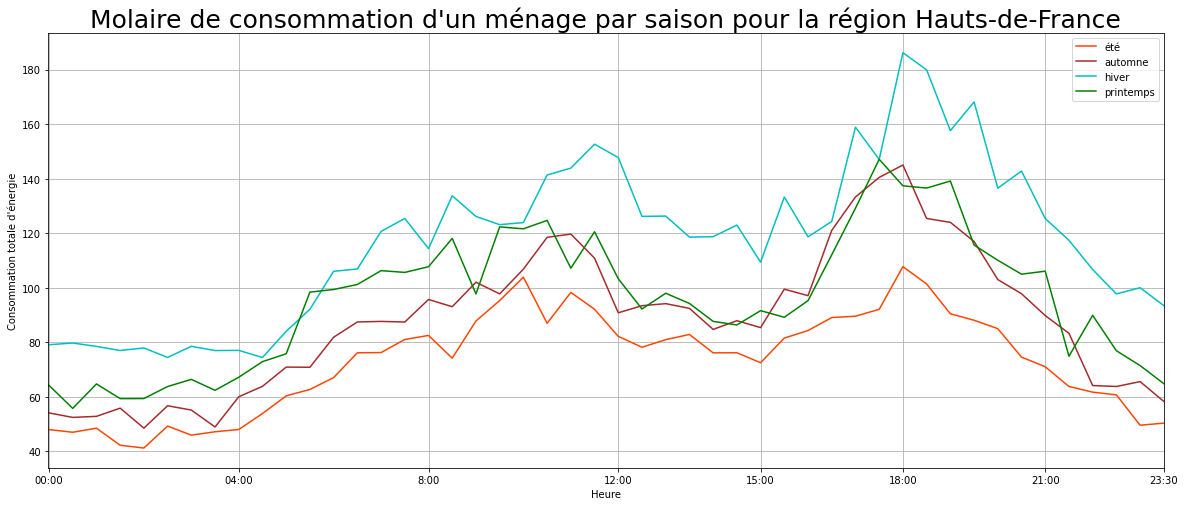

In [147]:
molaire_toute_saison("Hauts-de-France","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


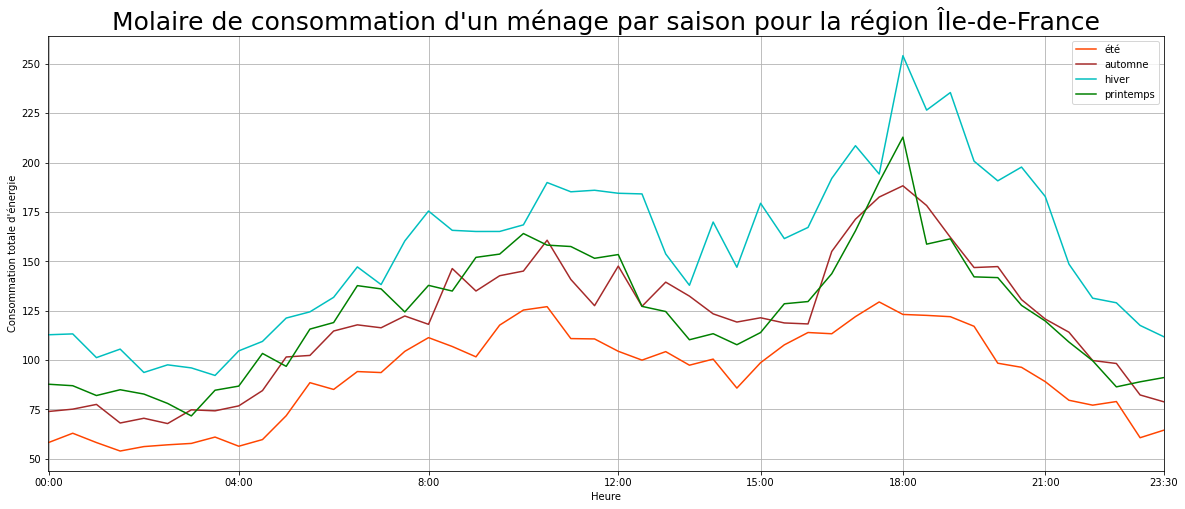

In [148]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-128-9882e34ec9e6>:29: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-128-9882e34ec9e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-128-9882e34ec9e6>:14: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


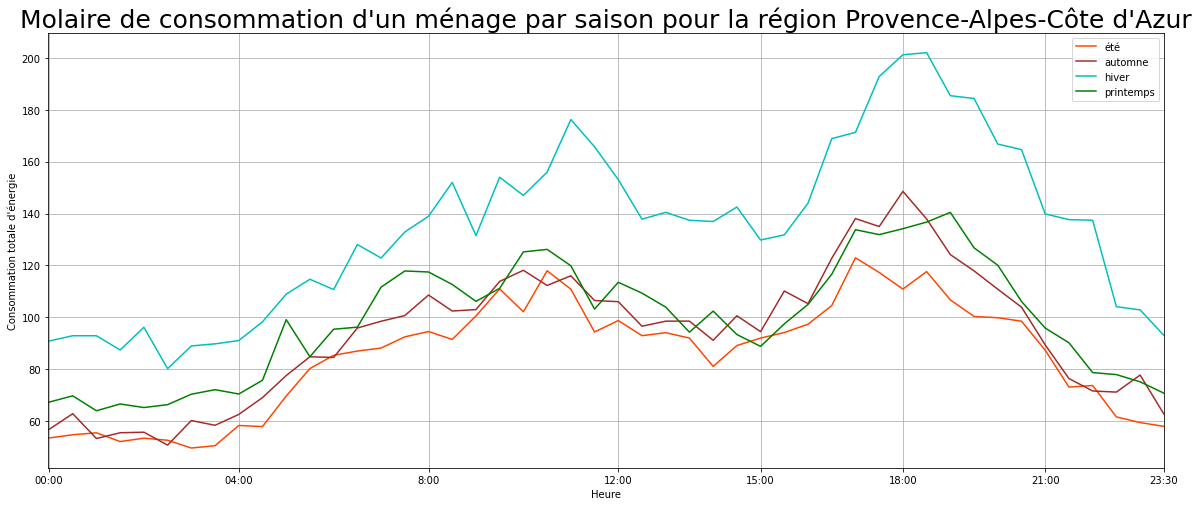

In [149]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")